Below is an engineering mechanics problem that can be solved with Python. Follow along to see how to solve the problem with code.

## Problem

### Given:

A cantilever beam of total length $a$+$L$+$b$ and loads $P_1$, $P_2$, $P_3$ to $P_n$ at distances $x_1$, $x_2$, $x_3$ to $x_n$.

![cantilever beam](loaded_beam.png)


### Find:

The shear, bending moment and normal stress at any point along the beam

## Solution

### Start the solution: install Python

We are going to use Python to code the solution to the problem. If you don't already have Python installed on your computer, I recommend installing the [Anaconda](https://www.anaconda.com/distribution/) distribution of Python. See [this post](https://pythonforundergradengineers.com/installing-anaconda-on-windows.html) to learn how to install Anaconda on your computer. 

I am coding this solution in a [Jupyter Notebook](https://jupyter.org/). Once you install Anaconda, you can open a Jupyter notebook from the Windows Start Menu or the Anaconda Prompt. See [this post](https://pythonforundergradengineers.com/opening-a-jupyter-notebook-on-windows.html) to learn about 3 ways to open a Jupyter notebook.

Alternatively, instead of using a Jupyter notebook, you could code your solution in a ```.py``` file and use a code editor such as [Visual Studio Code](https://code.visualstudio.com/download) or [Sublime Text](https://www.sublimetext.com/3).

**Alright. Let's get coding....** We will start our solution by asking the user for input.

### Ask the user for input

In the first part of our program, we need to ask the user for input. The user will input the dimensions of the beam, $a$, $L$, and $b$. The user will also enter the point loads $P_1$, $P_2$, ... $P_n$ and the distance between the point loads and the end of the beam $x_1$, $x_2$, ... $x_n$.

We will collect the user's input with Python's ```input()``` function. Note that Python's ```input()``` function outputs a _string_ by default. So we need to convert the user's input from a _string_ into a _float_ (a floating point number or a decimal) before we do any further calculations. The general structure of using ```input()``` is below:

```text
<string_var> = input("What the user sees at the prompt")
```

Where ```"What the user sees at the prompt"``` is the prompt shown to the user when the ```input()``` statement runs. This statement is what the ```input()``` function prints to the user. ```<string_var>``` is a variable to store whatever the user types.  Remember the ```input()``` function outputs a _string_ (a text variable) not a number.

The ```input()``` function can be wrapped with Python's ```float()``` function. The ```float()``` function turns the user's _string_ input into a _float_ (a floating point number or decimal).

Let's try a couple of ```input()``` statements wrapped by ```float()```. When we ask the user for the number of point loads, we'll wrap the ```input("how may points to load")``` with Python's ```int()``` function. The number of point loads must be an integer (can you have half a point load?...), so we will convert the _string_ (the output of the ```input()``` function) to an _integer_ with the ```int()``` function.

In [1]:
import numpy as np
a = float(input("What is length a? "))
L = float(input("What is length L? "))
b = float(input("What is length b? "))
n = int(input("How many point loads? "))

What is length a? 1
What is length L? 4
What is length b? 2
How many point loads? 3


We see four questions. After entering in a number after each question, push the [Enter] key. Now that we have the beam dimensions and number of point loads, we need to ask the user for the magnitude of each point load and distance each point load is applied at compared to the end of the beam.

### Ask the user for the point loads

Next, we need to ask the user for the point loads $P_1$, $P_2$, $P_3$, ... $P_n$ and the corresponding distances $x_1$, $x_2$, $x_3$, ... $x_n$.

We'll collect the point loads and distances with a _for loop_. Our _for loop_ will run the same number of times as the number of point loads ```n``` the user indicated. 

Because we are going to do some computation using the loads and distances the user enters, we will store the user's input in a _NumPy array_ that we'll call ```P```. A NumPy array is a data structure sort of like a Python list. The difference is mathematical operations can be completed on arrays, while mathematical operations on Python lists can be problematic (or require more code than if a NumPy array is used).

Because we know how many loads the user will enter, we also know the size of the array that the loads and distances will be stored in. We will use one row and two columns for each set of load and distance the user inputs. We can use NumPy's ```np.zeros()``` function to create an array of a given size that contains all ```0```'s. As the user enters loads and distances, we will save these values in different rows in the array. Note that we need to pass a tuple in parenthesis to the ```np.zeros()``` function as in ```P = np.zeros((2,4))```. ((There are two sets of parenthesis.))

The general syntax for putting a value in a specific location in a NumPy array is below:

```text
A[row][col] = var
```

Where ```A``` is the array, and ```row``` and ```col``` correspond to the locations in the array where ```var``` will be stored. For example, the code line below will store the value ```9``` in the first row, 2nd column of array ```A```. (Remember Python counting starts at ```0```).

```text
A[0][1] = 9
```

The code below asks the user for loads and distances, saves these in the pre-created array ```P``` and then prints out the load/distance pairs back to the user. We are putting the distances in the first column of the array and the loads in the second column of the array. Later in the program, we'll order the forces acting on the beam by distance. Having the distances in the first column makes this operation a little easier.

In [2]:
P = np.zeros((n,2))
for i in range(n):
    x = float(input(f"what is distance x_{i+1}? "))
    p = float(input(f"what is load P_{i+1}? "))
    P[i][0]=x
    P[i][1]=p
print("The distances and loads you entered are:")
print(P)

what is distance x_1? 2
what is load P_1? 10
what is distance x_2? 3
what is load P_2? 15
what is distance x_3? 4
what is load P_3? 5
The distances and loads you entered are:
[[ 2. 10.]
 [ 3. 15.]
 [ 4.  5.]]


We were asked for three pairs of loads and distances. We can see the loads and distances we entered as rows in the array that is printed out. The next step in solving this mechanics problem is to solve for the reaction forces at point $A$ and point $B$.

## Solve for the reaction forces Ra and Rb

Now that we have all of the distances and all of the applied loads saved into variables, we need to solve for the reaction forces at the supports $A$ and $B$.

### Find reaction force Rb

To find $R_B$, the reaction force at $B$, we will sum the moments about point $A$. Since we are summing the moments about point $A$, the reaction force $R_A$ produces zero moment. Each of the point load moments are are at a distance relative to point $A$ equal to $x-a$ where $a$ is the distance between the end of the beam and the support at point $A$. The equation for the sum of the moments about point $A$ is below.

$$ \sum{M_A} = 0 $$

$$ \sum{M_A} = M_1 + M_2 + M_3 + ... + M_n + M_B = 0 $$

Each individual moment $M_1$, $M_2$, $M_3$ to $M_n$ are due to the point loads $P_1$, $P_2$, $P_3$, $P_n$. Each one of these point loads is at a distance $r = (x - a)$ from point $A$. The equations below show how each moment in the series is calculated.

$$ M_1 = P_1r_1 \ where \ r_1 = x_1 - a$$

$$ M_1 = P_1(x_1 - a) $$

$$ M_n = P_n(x_n - a) $$

Substituting the loads and distances into the sum of moments equation yields the following. Note that we don't know the load at $B$ yet (that's what we are solving for), so that term stays as $M_B$:

$$ \sum{M_A} = P_1(x_1-a) + P_2(x_2-a) + P_3(x_3-a) + ... + P_n(x_n-a) + M_B = 0 $$

Solving for $M_B$ produces:

$$ M_B = - P_1(x_1-a) - P_2(x_2-a) - P_3(x_3-a) - ... - P_n(x_n-a) $$

We can code this into Python using a _for loop_ and array indexing. The point load $P$ is the first column of the array, the distance $x$ is in the second column of the array. Remember that Python counting starts at ```0```, so the first column is column ```0```. 

Reaction force $R_B$ is at a distance $L$ relative to point $A$. Since $M_B = P_br_b$ and $r_b = L$, We can solve for reaction force R_B using:

$$ M_B = P_Br_B $$

$$ M_B = P_BL $$

$$ P_B = \frac{M_B}{L} $$

The code below creates a variable ```Mb``` (the moment due to the reaction force at $B$), then iterates through the point load/distance pairs and calculates the moment due to each pair and assigns it to a variable ```Mi```. In the last line of the _for loop_, ```Mi``` is added to ```Mb```. The ```+=``` operator does _in place_ addition, meaning ```+=``` just adds onto whatever number is already stored in ```Mb```. At the end of the code block, the moment and reaction force are printed to the user using a Python _f-string_.

In [3]:
Mb = 0
for i in range(n):
    pi = P[i][1]
    ri = P[i][0]-a
    Mi = pi*ri
    Mb += Mi
print(f"The momement at due to reaction force at B, M_B = {Mb}")
Rb = Mb/L
print(f"The reaction force at B, R_b = {Rb}")

The momement at due to reaction force at B, M_B = 55.0
The reaction force at B, R_b = 13.75


We see the moment and reaction force at point $B$ is calculated. Next we will calculate the reaction force at point $A$.

### Find reaction force Ra

To find $R_A$, the reaction force at $A$, we will sum the forces in the $y$-direction. All of the point loads $P_1$, $P_2$, $P_n$ point down, so they count as negative force, the reaction forces $R_A$ and $R_B$ point up, so they count as positive force.

$$ \sum{F_y} = 0 $$

$$ \sum{M_y} = - P_1 - P_2 - P_3 - ... - P_n + R_A + R_B = 0 $$

$$ R_A = P_1 + P_2 + P_3 + ... + P_n - R_B $$

We can code this into Python using another _for loop_.

In [4]:
Pn = 0
for i in range(n):
    pi = P[i][1]
    Pn += pi
print(f"The sum of the applied point loads is P_n = {Pn}")
Ra = Pn - Rb
print(f"The reaction force at A, R_a = {Ra}")

The sum of the applied point loads is P_n = 30.0
The reaction force at A, R_a = 16.25


The sum of the point loads is displayed as well as the reaction force at $A$. Note how the reaction force at $A$ and the reaction force at $B$ sum to total of the applied point loads.

Now that all of the forces on the beam are known, we can work on the next part of the problem which is calculating the shear along the beam.

## Calculate the shear along the beam

Next we will calculate the shear along the beam. Since all of the loads and support reaction are point loads, the shear along the beam is composed of constant shear segments in between the point loads. We need to calculate the shear in between each applied load or reaction force.

### Sort the distance / load pairs by distance

We will start this process by creating an array that holds the applied point loads and distances as well as the reaction forces and their distance from the end of the beam. We will set all the applied point loads as negative because they point down and all the reaction forces as positive because they point up.

The code block below contains a tricky little line: ```P_sort = P[P[:,0].argsort()]```. Let's break this line down into it's component parts.

```P``` - the array that contains the distances and loads. The distances in the first column, the loads in the second column.

```P[:,0]``` - pull out all rows (```:```), the first column (```0```). This pull out the distances

```P[:,0].argsort()``` - creates an array of the indexes of the distance column from smallest to largest

```P[P[:,0].argsort()]``` - re-order ```P``` based on the array of indexes of distances that was sorted smallest to largest

```P_sort = P[P[:,0].argsort()]``` - save the re-ordered array that is based on distance to a new variable ```P_sort```

The code block below also prints out the unsorted array ```P``` and the array sorted by distance ```P_sort```.

In [5]:
P[:,1] *= -1      # multiply [all rows, second column] by -1 in place
P = np.append(P,[[a,Ra],[a+L,Rb]], axis=0)
print("The distances and forces acting on the beam are: ")
print(P)
P_sort = P[P[:,0].argsort()] #P[:,0].argsort() produces an array of indicies based on smallest to largest distance
print("Sorted by distance, all of the distances and forces acting on the beam are: ")
print(P_sort)

The distances and forces acting on the beam are: 
[[  2.   -10.  ]
 [  3.   -15.  ]
 [  4.    -5.  ]
 [  1.    16.25]
 [  5.    13.75]]
Sorted by distance, all of the distances and forces acting on the beam are: 
[[  1.    16.25]
 [  2.   -10.  ]
 [  3.   -15.  ]
 [  4.    -5.  ]
 [  5.    13.75]]


We see the array that contains the distances and loads which isn't sorted by distance (the reaction forces $R_B$ and $R_A$, are listed last). Then we see the sorted array that has loads and reaction forces based on distance $x$ from smallest to largest.

### Calculate the internal shear at small intervals along the beam

Now comes the peas and carrots part of our program. We are going to calculate the shear at all along the beam at small intervals.

To find the shear, first we need to create an array of $x$ values, which represent distances along the beam compared to the left-hand edge. To create the array, we'll use NumPy's ```np.linspace()``` function. The arguments passed to ```np.linspace()``` are ```(start, stop, num)```. In this case we want to start the $x$ values at ```0```, end at the end of the beam ($a+L+b$), and we'll choose ```100``` for the number of values. Next we'll create an array called ```V``` to store the shear at each $x$. We pass ```X.size``` to the ```np.zeros()``` function to ensure the ```V``` array has the same number of values as the ```X``` array.

After the arrays for $x$ and shear are created, we need to loop though each $x$ value and calculate the shear at that point. We calculate the shear at each point by looping through all the loads (```for p in P_sort:```) that are at a distance less than the $x$ value (```if p[0]<x```). If the load point is at a distance less than $x$, we add it to the shear for that $x$ (```v-=p[1]```). Once we finish looping through all the loads, we store the calculate shear (```V[i]=v```) at that $x$ in the array ```V```.

At the end of the code cell below, we print out the resulting shear array.

In [6]:
X = np.linspace(0,a+L+b,100) # create an array of 100 x values from 0 to the length of the beam
V = np.zeros(X.size)         # create an array for the shear at each x value, same size as the array of x values
for i,x in enumerate(X):     # loop through the x values, keep track of the number of times through the loop with enumerate
    v = 0                    # for each x value, start off by assuming 0 shear
    for p in P_sort:         # loop through each load
        if p[0]<x:           # if the x-value of the load is less than the x value we are trying to find the shear at....
            v+=p[1]          # shear counteracts the total load, so we add each load into the growing shear 
    V[i]=v                   # add the shear to the array of shear values
print(f"The shear at {V.size} points along the beam is: ")
print(V)

The shear at 100 points along the beam is: 
[  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.    16.25  16.25  16.25  16.25  16.25
  16.25  16.25  16.25  16.25  16.25  16.25  16.25  16.25  16.25   6.25
   6.25   6.25   6.25   6.25   6.25   6.25   6.25   6.25   6.25   6.25
   6.25   6.25   6.25  -8.75  -8.75  -8.75  -8.75  -8.75  -8.75  -8.75
  -8.75  -8.75  -8.75  -8.75  -8.75  -8.75  -8.75 -13.75 -13.75 -13.75
 -13.75 -13.75 -13.75 -13.75 -13.75 -13.75 -13.75 -13.75 -13.75 -13.75
 -13.75   0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]


We see 100 shear values. Note how the shear starts out at ```0``` and ends at ```0```. In between the shear is constant over varying length intervals.

Let's build a quick plot of shear vs. $x$ with [Matplotlib](https://matplotlib.org/). The line ```%matplotlib inline``` is used in a Jupyter notebook to show plots below code cells. If you are writing your code in a .py-file, make sure to leave out ```%matplotlib inline``` as it is not valid Python code.

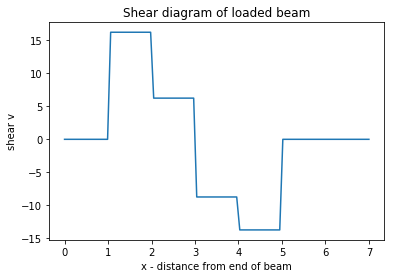

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,V)
plt.xlabel("x - distance from end of beam")
plt.ylabel("shear v")
plt.title("Shear diagram of loaded beam")
plt.show()

We see a plot with a couple straight line segments. Note how the shear changes at each point load or support force.

## Calculate the Moment along the beam

We successfully calculated the shear at each point along the beam. Next we'll calculate the moment along the beam. For each value of $x$, we find the moment by taking the sum of the moments about that $x$ point and sum to zero. The formula below shows the sum of the moments about point $x$.

$$ \sum{M_x} = 0 $$

$$ \sum{M_x} = M_1 + M_2 + M_3 + ... = 0 $$

Each individual moment $M_1$, $M_2$, $M_3$ to are due to the point loads $P_1$, $P_2$, $P_3$. Each one of these point loads is at a distance $r = (x-x_i)$ from point $x$ (where $x_i$ is the distance between the load and the end of the beam).

Substituting the loads and distances into the sum of moments equation yields the following. Note that we don't know the moment at $x$ yet (that's what we are solving for), so that term stays as $M$:

$$ \sum{M_x} = P_1(x-x_1) + P_2(x-x_2) + P_3(x-x_3) + ... + M = 0 $$

Solving for $M$ produces:

$$ M = - P_1(x- x_1) - P_2(x-x_2) - P_3(x-x_3) ...  $$

We need to be a little careful with signs here. The signs of the moments due to all the point loads are negative because they lead to a clockwise rotation of the beam. The reaction forces $R_a$ and $R_b$ produce positive moments because the reaction forces lead to a counter-clockwise rotation of the beam. 

The Python code that performs this calculation is below.

```
m += p[1]*(x-p[0])
```

In this code line we take the load from the load array (```p[1]```) and multiply it by the $x$ value minus the load distance (```x-p[0]```). The rest of the code block below is very similar to how we calculated the shear. We create an array ```M``` that's the same size as our array of $x$ values. Then we loop over the $x$ values. For each $x$ value, we loop over the distance / load array. If $x$ is greater than the distance of the point load, we calculate the moment and add it to ```m```. When we run out of distance / load points, we insert the calculated moment ```m``` into array ```M```. At the end of the code block we print out the moment array ```M``` to the user.

In [8]:
M = np.zeros(X.size) # create an array for the shear at each x values, make it the same size as the array of x values
for i,x in enumerate(X):     #loop through the x values, keep track of the number of times through the loop with enumerate
    m = 0                    # for each x value, start off by assuming 0 moment
    for p in P_sort:         # loop through each load
        if p[0]<x:           # if the x-value of the load is less than the x value we are trying to find the moment at
            m += p[1]*(x-p[0])   # moment = F*r = load * (x - load distance)  
    M[i]=m                   # add the moment to the array of moment values
print(f"The moment at {M.size} points along the beam is: ")
print(M)

The moment at 100 points along the beam is: 
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.84848485e-01
  2.13383838e+00  3.28282828e+00  4.43181818e+00  5.58080808e+00
  6.72979798e+00  7.87878788e+00  9.02777778e+00  1.01767677e+01
  1.13257576e+01  1.24747475e+01  1.36237374e+01  1.47727273e+01
  1.59217172e+01  1.65656566e+01  1.70075758e+01  1.74494949e+01
  1.78914141e+01  1.83333333e+01  1.87752525e+01  1.92171717e+01
  1.96590909e+01  2.01010101e+01  2.05429293e+01  2.09848485e+01
  2.14267677e+01  2.18686869e+01  2.23106061e+01  2.21464646e+01
  2.15277778e+01  2.09090909e+01  2.02904040e+01  1.96717172e+01
  1.90530303e+01  1.84343434e+01  1.78156566e+01  1.71969697e+01
  1.65782828e+01  1.59595960e+01  1.53409091e+01  1.47222222e+01
  1.41035354e+01  1.33333333e+01  1.23611111e

We see the moment values increase and decrease. The moment is zero at each end of the beam.

## Plot the moment vs. x

Next, we'll plot the moment vs. $x$, just like we plotted the shear vs. $x$ above. 

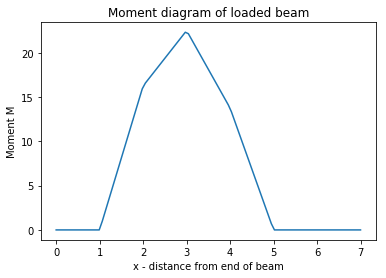

In [9]:
plt.plot(X,M)
plt.xlabel("x - distance from end of beam")
plt.ylabel("Moment M")
plt.title("Moment diagram of loaded beam")
plt.show()

We see a plot that shows zero moment at each end of the beam and a maximum moment near the center of the beam.

## Plot the shear and moment together

We'll finish up this solution by plotting the moment and shear together in the same figure. This plot allows us to see the shear and moment lined up.  We accomplish this using Matplotlib's ```plt.subplots()``` command and building each diagram on a different set of axes (```ax1``` and ```ax2```).

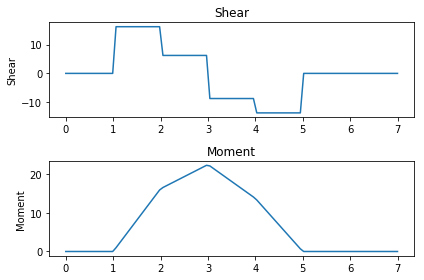

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1)
ax1.plot(X,V)
ax1.set_ylabel("Shear")
ax1.set_title("Shear")
ax2.plot(X,M)
ax2.set_ylabel("Moment")
ax2.set_title("Moment")
plt.tight_layout()
plt.show()

## Summary

In this post, we solved an engineering mechanics problem involving a beam subjected to point loads. First we ask the user for input. Next we solved for the reaction forces that hold the beam up. After that we calculated the shear and moment at each point using a pair of _for loops_. At the end we plotted the shear and moment on the same figure.